In [1]:
import sys
print(sys.version)

3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


In [2]:
#  GPU type   ## CUDA (Compute Unified Device Architecture)
!nvidia-smi

Sun May 25 00:50:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install toolz==0.12.1
!pip install rich==13.7.1
!pip install --upgrade ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: toolz
    Found existing installation: toolz 1.0.0
    Uninstalling toolz-1.0.0:
      Successfully uninstalled toolz-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
ibis-framework 9.2.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: rich
    Found existing installation: rich 14.0.0
    Uninstalling rich-14.0.0:
      Successfully uninstalled rich-14.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [4]:
# Install ultralytics
!pip -q install  ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is incompatible.
pylibcugraph-cu12 24.12.0 requires rmm-cu12==24.12.*, but you have rmm-

In [5]:
# Import libraries
import pandas as pd
import os
from pathlib import Path
import shutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm
import cv2
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
import multiprocessing
import numpy as np
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
import os

# Chemin du dataset
INPUT_DATA_DIR = "/kaggle/input/maize-corn-ds"



# Nouveaux chemins dans l'espace modifiable
WORK_DIR = Path("/kaggle/working")


# Lister fichiers et dossiers
print(os.listdir(INPUT_DATA_DIR))


['MAIZE']


In [7]:

!rm -rf /kaggle/working/*


In [8]:
!ls -lh /kaggle/working
    

total 344K
-rw-r--r-- 1 root root 343K May 25 00:52 __notebook__.ipynb


In [9]:
from pathlib import Path
DATASETS_DIR = Path(INPUT_DATA_DIR) / 'MAIZE'
DATASETS_DIR 


PosixPath('/kaggle/input/maize-corn-ds/MAIZE')

In [10]:
# Chemins originaux (lecture seule)
ORIG_TRAIN_IMAGES_DIR = DATASETS_DIR / 'images' / 'train'
ORIG_TRAIN_LABELS_DIR =  DATASETS_DIR / "labels" / "train"
TEST_IMAGES_DIR = DATASETS_DIR / 'images' / 'test'
TEST_LABELS_DIR = DATASETS_DIR / 'labels' / 'test'

In [11]:
VAL_IMAGES_DIR = WORK_DIR / "images/val"
VAL_LABELS_DIR = WORK_DIR / "labels/val"

In [12]:
for dir_path in [
                 VAL_IMAGES_DIR,VAL_LABELS_DIR]:
    dir_path.mkdir(parents=True, exist_ok=True)

In [13]:
contenu_dataset = [f.name for f in DATASETS_DIR.iterdir()]
print(contenu_dataset)

['labels', 'Data_mapped.csv', 'without_annotations', 'images', 'Train.csv', 'Test.csv', 'Data.csv', 'labels_xml']


In [14]:
# Fonction utilitaire
def count_files(directory):
    return len(list(directory.glob('*')))

In [15]:
# S'assurer que le dossier des labels existe, même s'il est vide pour le moment
ORIG_TRAIN_IMAGES_DIR.mkdir(parents=True, exist_ok=True)

In [16]:
## Count the number files in TRAIN_IMAGES_DIR
num_train_images = count_files(ORIG_TRAIN_IMAGES_DIR)
print(f"There are {num_train_images} in {ORIG_TRAIN_IMAGES_DIR}")

There are 16761 in /kaggle/input/maize-corn-ds/MAIZE/images/train


In [17]:
## Count the number files in TEST_IMAGES_DIR
num_test_images = count_files(TEST_IMAGES_DIR)
print(f"There are {num_test_images} in {TEST_IMAGES_DIR}")

There are 1863 in /kaggle/input/maize-corn-ds/MAIZE/images/test


In [18]:
ORIG_TRAIN_IMAGES_DIR.absolute()

PosixPath('/kaggle/input/maize-corn-ds/MAIZE/images/train')

In [19]:
train = pd.read_csv(os.path.join(DATASETS_DIR, 'Train.csv'))


In [20]:
train.head()

,Image_ID,class,confidence,ymin,xmin,ymax,xmax,class_id,ImagePath
0,ID_625a7f2c.jpg,maize_streak_disease,1.0,1374.0,35.0,4608.0,2731.0,2,images/train/ID_625a7f2c.jpg
1,ID_e959e603.jpg,fall_armyworm,1.0,1022.0,1378.0,1379.0,1697.0,1,images/train/ID_e959e603.jpg
2,ID_e959e603.jpg,fall_armyworm,1.0,1379.0,1466.0,1736.0,1711.0,1,images/train/ID_e959e603.jpg
3,ID_e959e603.jpg,fall_armyworm,1.0,406.0,2204.0,1043.0,2617.0,1,images/train/ID_e959e603.jpg
4,ID_e959e603.jpg,fall_armyworm,1.0,879.0,2064.0,1257.0,2396.0,1,images/train/ID_e959e603.jpg


In [21]:
train['ImagePath'].nunique()

16761

In [22]:
train['class'] = train['class'].str.strip()
train['class'].unique()

array(['maize_streak_disease', 'fall_armyworm', 'healthy'], dtype=object)

In [23]:

class_with_id = (train['class_id'].astype(str) + ': ' + train['class']).drop_duplicates().sort_values().values
print(class_with_id)


['0: healthy' '1: fall_armyworm' '2: maize_streak_disease']


In [24]:
unique_classes = train['class'].unique().tolist()
unique_classes

['maize_streak_disease', 'fall_armyworm', 'healthy']

In [25]:
sorted_classes = sorted(unique_classes)
sorted_classes

['fall_armyworm', 'healthy', 'maize_streak_disease']

In [26]:
enumerated_list = list(enumerate(sorted_classes))
enumerated_list

[(0, 'fall_armyworm'), (1, 'healthy'), (2, 'maize_streak_disease')]

In [27]:
import pandas as pd

# Charger le fichier d'annotations
train_df = pd.read_csv(DATASETS_DIR / "Train.csv")


print(f"✅ Fichier d'annotations chargé : {len(train_df)} lignes")

# Obtenir le nombre d'images uniques
unique_images = train_df['Image_ID'].unique()  # Remplacez 'Image_ID' par le nom de la colonne appropriée
num_unique_images = len(unique_images)

print(f"🔍 Nombre d'images uniques : {num_unique_images}")


✅ Fichier d'annotations chargé : 91419 lignes
🔍 Nombre d'images uniques : 16761


In [28]:
train_df = pd.read_csv(DATASETS_DIR / "Train.csv")


In [29]:
print(f"DataFrame chargé : {len(train_df)} boîtes initiales")


DataFrame chargé : 91419 boîtes initiales


In [30]:
def bb_intersection_over_union(boxA, boxB):
    """
    Calculate IoU between two boxes
    
    Args:
        boxA: [ymin, xmin, ymax, xmax]  # Note: ordre cohérent avec votre DataFrame
        boxB: [ymin, xmin, ymax, xmax]  # Note: ordre cohérent avec votre DataFrame
    """
    # On réorganise les coordonnées pour le calcul (ymin,xmin → xmin,ymin)
    xA = max(boxA[1], boxB[1])  # xmin
    yA = max(boxA[0], boxB[0])  # ymin
    xB = min(boxA[3], boxB[3])  # xmax
    yB = min(boxA[2], boxB[2])  # ymax

    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    boxAArea = (boxA[3] - boxA[1] + 1) * (boxA[2] - boxA[0] + 1)  # (xmax-xmin)*(ymax-ymin)
    boxBArea = (boxB[3] - boxB[1] + 1) * (boxB[2] - boxB[0] + 1)  # (xmax-xmin)*(ymax-ymin)

    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

In [31]:
import random
from tqdm import tqdm

def random_nms(df, threshold, seed=None):
    """
    Applique un NMS aléatoire classe par classe sur chaque image.
    Affiche uniquement une barre de progression propre (tqdm).
    """
    if seed is not None:
        random.seed(seed)

    results = []

    for img_id in tqdm(df["Image_ID"].unique(), desc="📦 Traitement NMS", unit="image"):
        img_df = df[df["Image_ID"] == img_id].copy()

        if len(img_df) <= 1:
            results.append(img_df)
            continue

        keep_indices = []
        for cls in img_df["class"].unique():
            class_indices = img_df.index[img_df["class"] == cls].tolist()
            
            if len(class_indices) <= 1:
                keep_indices.extend(class_indices)
                continue

            boxes = img_df.loc[class_indices, ["ymin", "xmin", "ymax", "xmax"]].values
            indices = list(range(len(boxes)))
            random.shuffle(indices)

            class_keep = []
            while indices:
                i = indices.pop(0)
                class_keep.append(i)

                remaining_boxes = [boxes[j] for j in indices]
                ious = [bb_intersection_over_union(boxes[i], box_j) for box_j in remaining_boxes]

                new_indices = []
                for j, iou in zip(indices, ious):
                    if iou <= threshold:
                        new_indices.append(j)
                indices = new_indices

            keep_indices.extend([class_indices[i] for i in class_keep])

        results.append(img_df.loc[keep_indices])

    filtered_df = pd.concat(results, ignore_index=True)
    print(f"\n✅ Résultat final: {len(df)} boxes → {len(filtered_df)} boxes après NMS")
    return filtered_df


In [32]:
def get_filtered_train_df(df, iou_threshold=1.0, seed=42):
    """Garantie la conservation de toutes les colonnes"""
    # Vérification rapide
    needed = ['ymin','xmin','ymax','xmax']
    assert all(col in df.columns for col in needed), f"Il manque {set(needed)-set(df.columns)}"
    
    filtered = random_nms(df, iou_threshold, seed)
    
    # Vérification que rien n'a été perdu
    assert set(df.columns) == set(filtered.columns), "Colonnes perdues durant le traitement"
    
    return filtered

In [33]:
# Application du NMS
filtered_train_df = get_filtered_train_df(train_df, iou_threshold=1.0)

# Vérification rapide du résultat
print(f"Boîtes avant/après : {len(train_df)} → {len(filtered_train_df)}")
filtered_train_df[['Image_ID', 'class', 'ymin', 'xmin', 'ymax', 'xmax']].head(2)

📦 Traitement NMS: 100%|██████████| 16761/16761 [02:24<00:00, 115.66image/s]



✅ Résultat final: 91419 boxes → 91419 boxes après NMS
Boîtes avant/après : 91419 → 91419


,Image_ID,class,ymin,xmin,ymax,xmax
0,ID_625a7f2c.jpg,maize_streak_disease,1374.0,35.0,4608.0,2731.0
1,ID_e959e603.jpg,fall_armyworm,1802.0,2176.0,2268.0,2589.0


In [34]:
print("Top 5 suppressions:\n", (train_df['Image_ID'].value_counts() - filtered_train_df['Image_ID'].value_counts()).nlargest(5))

Top 5 suppressions:
 Image_ID
ID_5dca7b9d.jpg    0
ID_ced623cc.jpg    0
ID_e4cd286d.jpg    0
ID_a00f2aba.jpg    0
ID_b7263c47.jpg    0
Name: count, dtype: int64


In [35]:
# Facultatif : filtered_train_df le nouveau fichier prend le relais 
filtered_train_df.to_csv(WORK_DIR / "filtered_train_df.csv", index=False)

In [36]:
# =====================
# ANALYSE DES RÉSULTATS
# =====================

# 1. Statistiques globales
total_avant = len(train_df)
total_apres = len(filtered_train_df)
boites_supprimees = total_avant - total_apres
pourcentage_supprime = (boites_supprimees / total_avant) * 100

# 2. Statistiques par classe
stats_classes = []
for classe in train_df['class'].unique():
    nb_avant = len(train_df[train_df['class'] == classe])
    nb_apres = len(filtered_train_df[filtered_train_df['class'] == classe])
    suppression = nb_avant - nb_apres
    stats_classes.append((classe, nb_avant, nb_apres, suppression, suppression/nb_avant*100))

# 3. Images les plus impactées
top_images = (train_df['Image_ID'].value_counts() 
              - filtered_train_df['Image_ID'].value_counts()).nlargest(5)

# =====================
# AFFICHAGE DES RÉSULTATS
# =====================

# Entête
print("\n" + "="*50)
print("📊 ANALYSE DÉTAILLÉE DU FILTRAGE NMS")
print(f"🔧 Seuil IoU utilisé : ****")
print("="*50)

# Section 1: Totaux
print("\n● STATISTIQUES GLOBALES")
print(f"Boîtes avant NMS : {total_avant}")
print(f"Boîtes après NMS : {total_apres}")
print(f"Boîtes supprimées : {boites_supprimees} ({pourcentage_supprime:.1f}%)")

# Section 2: Par classe
print("\n● ANALYSE PAR CLASSE")
print(f"{'Classe':<15} | {'Avant':>6} | {'Après':>6} | {'Suppr.':>6} | {'%':>6}")
print("-"*45)
for classe, av, ap, suppr, pct in stats_classes:
    print(f"{classe:<15} | {av:>6} | {ap:>6} | {suppr:>6} | {pct:>5.1f}%")

# Section 3: Images problématiques
print("\n● TOP 5 IMAGES AVEC PLUS DE SUPPRESSIONS")
print(top_images.to_string())

# Section 4: Aperçu
print("\n● APERÇU DES DONNÉES FILTRÉES")
display(filtered_train_df[['Image_ID', 'class', 'confidence']].head(2))


📊 ANALYSE DÉTAILLÉE DU FILTRAGE NMS
🔧 Seuil IoU utilisé : ****

● STATISTIQUES GLOBALES
Boîtes avant NMS : 91419
Boîtes après NMS : 91419
Boîtes supprimées : 0 (0.0%)

● ANALYSE PAR CLASSE
Classe          |  Avant |  Après | Suppr. |      %
---------------------------------------------
maize_streak_disease |  13327 |  13327 |      0 |   0.0%
fall_armyworm   |  54179 |  54179 |      0 |   0.0%
healthy         |  23913 |  23913 |      0 |   0.0%

● TOP 5 IMAGES AVEC PLUS DE SUPPRESSIONS
Image_ID
ID_5dca7b9d.jpg    0
ID_ced623cc.jpg    0
ID_e4cd286d.jpg    0
ID_a00f2aba.jpg    0
ID_b7263c47.jpg    0

● APERÇU DES DONNÉES FILTRÉES


,Image_ID,class,confidence
0,ID_625a7f2c.jpg,maize_streak_disease,1.0
1,ID_e959e603.jpg,fall_armyworm,1.0


In [37]:
all_data_df = pd.read_csv(WORK_DIR / "filtered_train_df.csv")


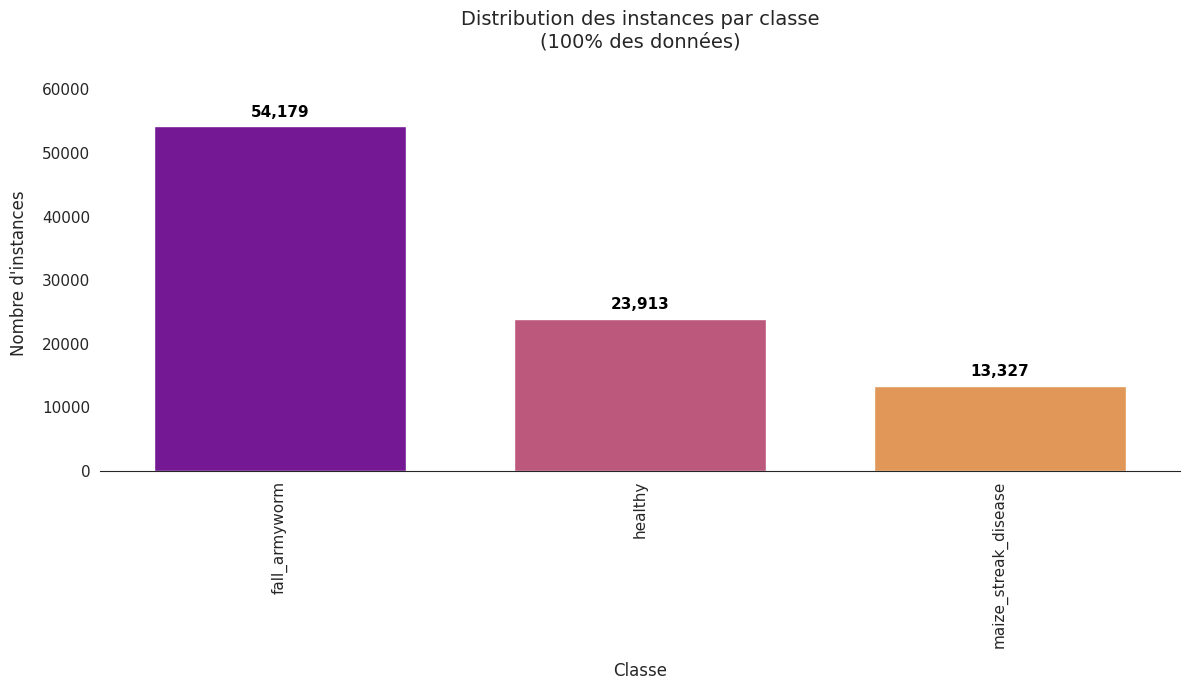

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compter le nombre d'instances par classe
class_counts = all_data_df['class'].value_counts()

# Paramètres de style
sns.set_style("white")
plt.figure(figsize=(12, 7))

# Création du barplot avec barres épaisses
barplot = sns.barplot(x=class_counts.index, 
                      y=class_counts.values, 
                      hue=class_counts.index, 
                      palette='plasma',
                      dodge=False,
                      width=0.7)

# Rotation des étiquettes de l'axe x (90 degrés pour vertical)
plt.xticks(rotation=90, fontsize=11, ha='center')  # rotation=90 pour vertical

# Affichage des valeurs sur les barres
for i, value in enumerate(class_counts.values):
    barplot.text(i, 
                 value + 0.02 * max(class_counts.values),
                 f"{value:,}", 
                 ha='center', 
                 va='bottom', 
                 fontsize=11,
                 fontweight='bold',
                 color='black')

# Titres et labels
plt.title('Distribution des instances par classe\n(100% des données)', fontsize=14, pad=20)
plt.xlabel('Classe', fontsize=12, labelpad=10)
plt.ylabel("Nombre d'instances", fontsize=12, labelpad=10)

# Ajustement des axes et apparence
plt.ylim(0, max(class_counts.values) * 1.15)
plt.yticks(fontsize=11)
plt.legend().remove()
sns.despine(left=True)

# Ajuster les marges pour accommoder les étiquettes verticales
plt.tight_layout()

plt.show()

In [39]:
# Facultatif : filtered_train_df le nouveau fichier prend le relais 
train_df = pd.read_csv(WORK_DIR / "filtered_train_df.csv")


In [40]:

# === Nombre d'instances par classe ===
class_counts = train_df['class'].value_counts()

print("Intsnce par classe pour l'ensemble total d'entrainemen", class_counts)
max_count = class_counts.max()
print("Max instance count (classe majoritaire) :", max_count)

Intsnce par classe pour l'ensemble total d'entrainemen class
fall_armyworm           54179
healthy                 23913
maize_streak_disease    13327
Name: count, dtype: int64
Max instance count (classe majoritaire) : 54179


In [41]:
unique_images_per_class = train_df.groupby('class')['Image_ID'].nunique()

print("Nombre d’images uniques par classe :\n", unique_images_per_class)


Nombre d’images uniques par classe :
 class
fall_armyworm           5591
healthy                 5228
maize_streak_disease    6149
Name: Image_ID, dtype: int64


In [42]:
duplicated_rows = []


# Création de l'arborescence
#NEW_TRAIN_IMAGES_DIR = WORK_DIR / "images/train"
#ORIG_TRAIN_LABELS_DIR

#NEW_TRAIN_LABELS_DIR = WORK_DIR / "labels/train"

NEW_TRAIN_LABELS_DIR ="/kaggle/input/corn-maize-computer-vision/maize/ds/labels/train"


In [43]:
# Fonction utilitaire
def count_files(directory):
    return len(list(directory.glob('*')))

In [44]:
from pathlib import Path

image_name = "ID_0a1d43a6.jpg"
existe = (ORIG_TRAIN_IMAGES_DIR / image_name).exists()
print(existe)

False


In [45]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from copy import deepcopy

# 0. Copie protégée des données ORIGINALES (avant duplication)
original_train_df = deepcopy(train_df)  # Assurez-vous que train_df n'est pas déjà dupliqué

# 1. Vérification initiale
print("=== VÉRIFICATION INITIALE ===")
print(f"Annotations totales: {len(original_train_df):,}")
print(f"Images uniques: {original_train_df['Image_ID'].nunique():,}")
print("\nDistribution initiale:")
print(original_train_df['class'].value_counts())

# 2. Séparation INITIALE en train/val (avant duplication)
def initial_pure_split(df, test_size=0.2):
    # On groupe par image et on garde la première classe associée (stratification)
    image_classes = df.groupby('Image_ID')['class'].first().reset_index()
    
    # Split stratifié au niveau des images
    train_img_ids, val_img_ids = train_test_split(
        image_classes['Image_ID'],
        test_size=test_size,
        stratify=image_classes['class'],
        random_state=42
    )
    
    return (
        df[df['Image_ID'].isin(train_img_ids)].copy(),  # Train initial
        df[df['Image_ID'].isin(val_img_ids)].copy()    # Val pur (à ne pas dupliquer)
    )

# 3. Application du split initial
train_split, val_split = initial_pure_split(original_train_df)

# 4. [Votre code de duplication ici...]

# 5. Après duplication, recréer les listes d'identifiants
train_names = train_split['Image_ID'].unique().tolist()  
val_names = val_split['Image_ID'].unique().tolist()      # Reste pur

# 5. Fonction pour afficher les stats par classe
def print_class_stats(df, name):
    print(f"\n=== STATS PAR CLASSE - {name.upper()} ===")
    stats = df.groupby('class')['Image_ID'].agg(['count', 'nunique'])
    stats.columns = ['Annotations', 'Images_uniques']
    print(stats)
    print(f"\nTotal images uniques ({name}): {df['Image_ID'].nunique():,}")

# 6. Fonction pour vérifier l'équilibre des classes
def verify_balance(df, name):
    counts = df['class'].value_counts()
    print(f"\n=== {name.upper()} ===")
    print(f"Annotations: {len(df):,}")
    print(f"Images uniques: {df['Image_ID'].nunique():,}")
    print("\nDistribution absolue:")
    print(counts)
    print("\nDistribution relative:")
    print((counts / counts.sum()).round(3))
    print(f"Écart max: {counts.max() - counts.min()} annotations")

# 7. Vérifications originales + nouvelles stats
verify_balance(train_split, "TRAIN")
print_class_stats(train_split, "TRAIN")

verify_balance(val_split, "VALIDATION") 
print_class_stats(val_split, "VALIDATION")

# 8. Vérification d'intégrité (inchangée)
common_images = set(train_split['Image_ID']) & set(val_split['Image_ID'])
assert len(common_images) == 0, f"Fuites détectées: {len(common_images)} images en commun"
assert abs(len(train_split) + len(val_split) - len(original_train_df)) <= 1, "Perte de données"
print("\n✅ Vérifications d'intégrité passées")


=== VÉRIFICATION INITIALE ===
Annotations totales: 91,419
Images uniques: 16,761

Distribution initiale:
class
fall_armyworm           54179
healthy                 23913
maize_streak_disease    13327
Name: count, dtype: int64

=== TRAIN ===
Annotations: 72,358
Images uniques: 13,408

Distribution absolue:
class
fall_armyworm           42689
healthy                 19019
maize_streak_disease    10650
Name: count, dtype: int64

Distribution relative:
class
fall_armyworm           0.590
healthy                 0.263
maize_streak_disease    0.147
Name: count, dtype: float64
Écart max: 32039 annotations

=== STATS PAR CLASSE - TRAIN ===
                      Annotations  Images_uniques
class                                            
fall_armyworm               42689            4475
healthy                     19019            4186
maize_streak_disease        10650            4924

Total images uniques (TRAIN): 13,408

=== VALIDATION ===
Annotations: 19,061
Images uniques: 3,353

Distribu

In [46]:
train_df = train_split.copy()
val_df = val_split.copy()


In [47]:
train_df.head()

,Image_ID,class,confidence,ymin,xmin,ymax,xmax,class_id,ImagePath
0,ID_625a7f2c.jpg,maize_streak_disease,1.0,1374.0,35.0,4608.0,2731.0,2,images/train/ID_625a7f2c.jpg
23,ID_5f5daa1a.jpg,healthy,1.0,1091.0,656.0,1343.0,924.0,0,images/train/ID_5f5daa1a.jpg
24,ID_5f5daa1a.jpg,healthy,1.0,705.0,46.0,1180.0,336.0,0,images/train/ID_5f5daa1a.jpg
25,ID_5f5daa1a.jpg,healthy,1.0,1091.0,1283.0,1536.0,1970.0,0,images/train/ID_5f5daa1a.jpg
26,ID_5f5daa1a.jpg,healthy,1.0,886.0,1834.0,1222.0,2048.0,0,images/train/ID_5f5daa1a.jpg


In [48]:
val_df.head()

,Image_ID,class,confidence,ymin,xmin,ymax,xmax,class_id,ImagePath
1,ID_e959e603.jpg,fall_armyworm,1.0,1802.0,2176.0,2268.0,2589.0,1,images/train/ID_e959e603.jpg
2,ID_e959e603.jpg,fall_armyworm,1.0,1183.0,2893.0,1396.0,3099.0,1,images/train/ID_e959e603.jpg
3,ID_e959e603.jpg,fall_armyworm,1.0,406.0,2204.0,1043.0,2617.0,1,images/train/ID_e959e603.jpg
4,ID_e959e603.jpg,fall_armyworm,1.0,305.0,3302.0,595.0,3712.0,1,images/train/ID_e959e603.jpg
5,ID_e959e603.jpg,fall_armyworm,1.0,361.0,2018.0,616.0,2148.0,1,images/train/ID_e959e603.jpg


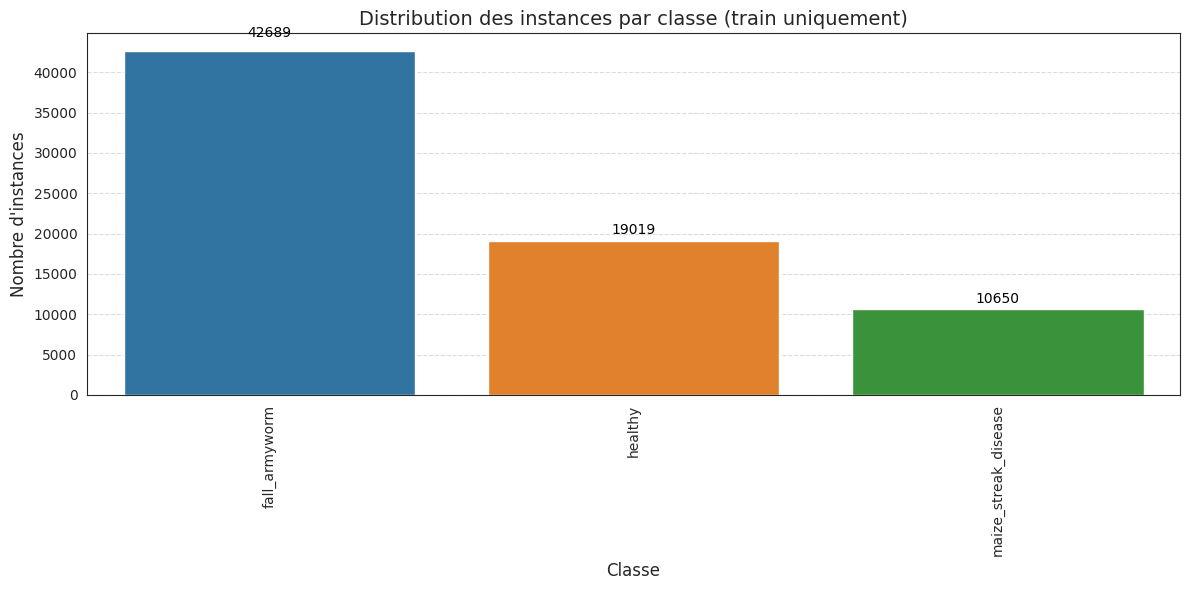

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter le nombre d'instances (annotations) par classe
class_counts = train_split['class'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
)

# Affichage des valeurs au-dessus des barres
for i, value in enumerate(class_counts.values):
    plt.text(i, value + 0.03 * value, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Améliorations visuelles
plt.title('Distribution des instances par classe (train uniquement)', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel("Nombre d'instances", fontsize=12)
plt.xticks(rotation=90)  # Noms des classes verticaux
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend().remove()  # Supprime la légende inutile
plt.show()


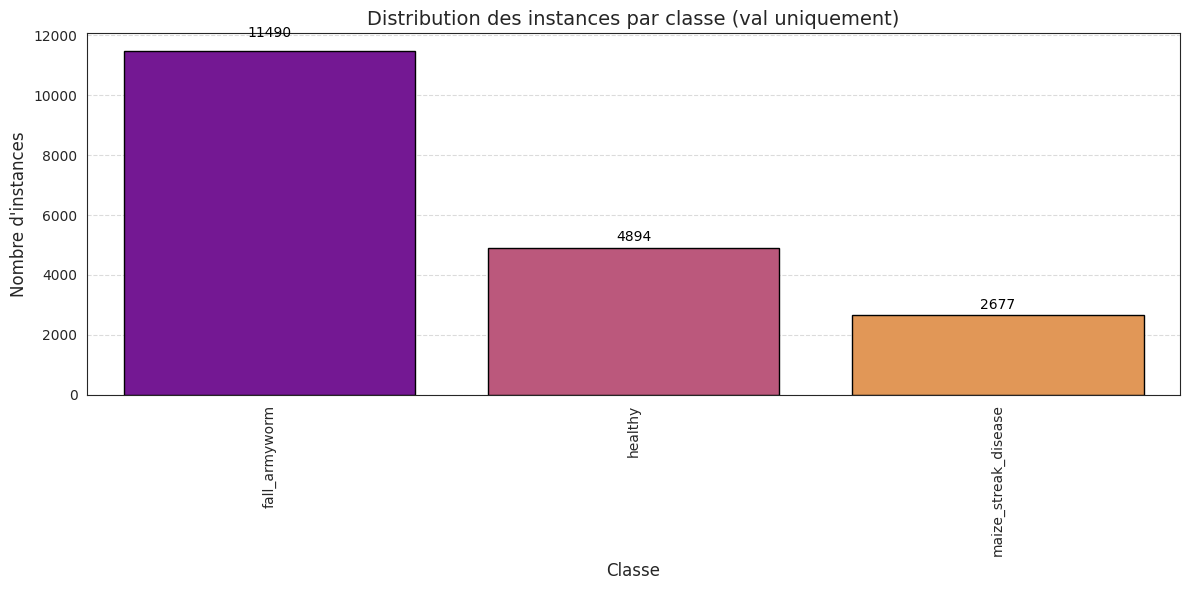

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter le nombre d'instances (annotations) par classe
class_counts = val_split['class'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=class_counts.index,
    y=class_counts.values,
    palette='plasma',
    edgecolor='black'
)

# Affichage des valeurs au-dessus des barres
for i, value in enumerate(class_counts.values):
    plt.text(i, value + 0.03 * value, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Améliorations visuelles
plt.title('Distribution des instances par classe (val uniquement)', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel("Nombre d'instances", fontsize=12)
plt.xticks(rotation=90)  # Noms des classes verticaux
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend().remove()  # Supprime la légende inutile
plt.show()


In [51]:
# === 1. Statistiques sur train_split ===
class_counts = train_split['class'].value_counts()
print("\n🎯 Distribution des classes dans train_split :")
print(class_counts)

# === 2. Sauvegarde directe sans duplication ===
final_train_df = train_split.copy()
final_train_df.to_csv(WORK_DIR / "balanced_train_df.csv", index=False)
    
print("\n📊 Statistiques FINALES :")
print("=== TRAIN (sans duplication) ===")
print(f"Annotations: {len(final_train_df):,}")
print(f"Images uniques: {final_train_df['Image_ID'].nunique():,}")
print(final_train_df['class'].value_counts())
    
print("\n=== VALIDATION ===")
print(f"Annotations: {len(val_split):,}")
print(f"Images uniques: {val_split['Image_ID'].nunique():,}")
print(val_split['class'].value_counts())


🎯 Distribution des classes dans train_split :
class
fall_armyworm           42689
healthy                 19019
maize_streak_disease    10650
Name: count, dtype: int64

📊 Statistiques FINALES :
=== TRAIN (sans duplication) ===
Annotations: 72,358
Images uniques: 13,408
class
fall_armyworm           42689
healthy                 19019
maize_streak_disease    10650
Name: count, dtype: int64

=== VALIDATION ===
Annotations: 19,061
Images uniques: 3,353
class
fall_armyworm           11490
healthy                  4894
maize_streak_disease     2677
Name: count, dtype: int64


In [52]:
from PIL import Image, ExifTags
from pathlib import Path
from collections import Counter

# Dossier contenant tes images
image_dir = ORIG_TRAIN_IMAGES_DIR  # adapte la variable si besoin

# Extensions valides
valid_extensions = {'.jpg'}

# Dictionnaire pour compter les orientations
orientation_counts = Counter()
no_exif_count = 0
total_images = 0

for img_path in Path(image_dir).iterdir():
    if img_path.suffix not in valid_extensions:
        continue
    total_images += 1
    try:
        img = Image.open(img_path)
        exif = img._getexif()
        if exif is not None:
            # Trouver la clé pour Orientation
            orientation_key = None
            for key, value in ExifTags.TAGS.items():
                if value == 'Orientation':
                    orientation_key = key
                    break
            orientation = exif.get(orientation_key, None)
            if orientation is not None:
                orientation_counts[orientation] += 1
            else:
                no_exif_count += 1
        else:
            no_exif_count += 1
    except Exception as e:
        print(f"Erreur pour {img_path.name}: {e}")
        no_exif_count += 1

print("\n--- Bilan EXIF Orientation ---")
print(f"Total images analysées : {total_images}")
print(f"Images sans orientation EXIF : {no_exif_count}")
for k, v in orientation_counts.items():
    print(f"Orientation EXIF = {k} : {v} images")


--- Bilan EXIF Orientation ---
Total images analysées : 16761
Images sans orientation EXIF : 7546
Orientation EXIF = 0 : 4933 images
Orientation EXIF = 1 : 2319 images
Orientation EXIF = 6 : 1787 images
Orientation EXIF = 8 : 44 images
Orientation EXIF = 3 : 132 images


In [53]:

train_df = train_split
val_df = val_split

print(f"✅ Fichier d'annotations chargé : {len(train_df)} lignes")
print(f"TRAIN - Images uniques : {train_df['Image_ID'].nunique():,}")


✅ Fichier d'annotations chargé : 72358 lignes
TRAIN - Images uniques : 13,408


In [54]:
print(f"✅ Fichier d'annotations chargé : {len(val_df)} lignes")
print(f"VAL - Images uniques : {val_df['Image_ID'].nunique():,}")

✅ Fichier d'annotations chargé : 19061 lignes
VAL - Images uniques : 3,353


In [55]:
"ID_625a7f2c.jpg" in train_df["Image_ID"].values


True

In [56]:
"ID_625a7f2c.jpg" in val_df["Image_ID"].values


False



from PIL import Image, ExifTags  # 🔧 MODIFIÉ : Ajout de PIL pour gérer l'orientation
import numpy as np               # 🔧 MODIFIÉ : Ajout de numpy pour conversion image PIL
import cv2




# === Fonction pour charger une image en corrigeant l'orientation EXIF === 🔧 MODIFIÉ : ajout de cette fonction
def load_image_with_orientation(path):
    image = Image.open(path)
    try:
        for flag in ExifTags.TAGS.keys():
            if ExifTags.TAGS[flag] == 'Orientation':
                break
        exif = image._getexif()
        if exif is not None:
            orientation = exif.get(flag)
            if orientation == 3:
                image = image.rotate(180, expand=True)
            elif orientation == 6:
                image = image.rotate(270, expand=True)
            elif orientation == 8:
                image = image.rotate(90, expand=True)
    except Exception as e:
        print(f"⚠️ Erreur EXIF sur {path.name} : {e}")  # 🔧 MODIFIÉ : meilleure gestion des erreurs
    return np.array(image)  # 🔧 MODIFIÉ : retourne un tableau numpy compatible avec OpenCV

# === Fonction pour créer les labels YOLO === (inchangée)
def create_yolo_labels(image_name, img_boxes, img_width, img_height, label_dir):
    label_filename = f"{Path(image_name).stem}.txt"
    label_path = label_dir / label_filename

    with open(label_path, "w") as f:
        for _, row in img_boxes.iterrows():
            x_center = (row["xmin"] + row["xmax"]) / 2 / img_width
            y_center = (row["ymin"] + row["ymax"]) / 2 / img_height
            width = (row["xmax"] - row["xmin"]) / img_width
            height = (row["ymax"] - row["ymin"]) / img_height
            f.write(f"{row['class_id']} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

# === Chargement des annotations ===
print(f"✅ Fichier d'annotations chargé : {len(train_df)} lignes")

# === Génération des labels ===
print("\n🔄 Génération des labels pour les images d'entraînement...")
ORIG_TRAIN_IMAGES_DIR.mkdir(parents=True, exist_ok=True)

valid_extensions = {'.jpg'}
image_paths = [img_path for img_path in ORIG_TRAIN_IMAGES_DIR.iterdir() 
               if img_path.suffix in valid_extensions 
               and img_path.stem in train_df['Image_ID'].values]
#image_paths = [img_path for img_path in NEW_TRAIN_IMAGES_DIR.iterdir() if img_path.suffix in valid_extensions]

error_count = 0

for image_path in tqdm(image_paths, desc="Traitement des images"):
    image_name = image_path.name

    # 🔧 MODIFIÉ : Remplacement de cv2.imread par fonction avec gestion orientation EXIF
    try:
        img = load_image_with_orientation(image_path)
    except Exception as e:
        print(f"⚠️ Erreur de chargement : {image_path.name} → {e}")
        error_count += 1
        continue

    img_height, img_width = img.shape[:2]

    img_boxes = train_df[train_df["Image_ID"] == Path(image_name).stem]

    if img_boxes.empty:
        print(f"⚠️ Aucune annotation trouvée pour l'image : {image_name}")
        error_count += 1
        continue

    create_yolo_labels(image_name, img_boxes, img_width, img_height, NEW_TRAIN_LABELS_DIR)

print("\n✅ Génération des labels terminée !")
print(f"Nombre total d'erreurs : {error_count}")
print(f"📂 Labels générés dans : {NEW_TRAIN_LABELS_DIR}")


In [57]:

ORIG_TRAIN_LABELS_DIR = DATASETS_DIR / 'labels' / 'train'


In [58]:

# Vérification de l'existence du dossier
train_labels_path = Path(ORIG_TRAIN_LABELS_DIR)

if not train_labels_path.exists():
    print(f"❌ Le dossier {ORIG_TRAIN_LABELS_DIR} n'existe pas.")
else:
    # Récupérer la liste des fichiers
    files = [f.name for f in train_labels_path.glob("*.txt") if f.is_file()]

    # Afficher le nombre total de fichiers
    num_train_labels = len(files)
    print(f"✅ Il y a {num_train_labels} fichiers dans {ORIG_TRAIN_LABELS_DIR}")

    # Vérifier les doublons
    duplicates = set([file for file in files if files.count(file) > 1])

    if duplicates:
        print(f"⚠️ Il y a des doublons : {duplicates}")
    else:
        print("✅ Il n'y a pas de doublons.")


✅ Il y a 16761 fichiers dans /kaggle/input/maize-corn-ds/MAIZE/labels/train
✅ Il n'y a pas de doublons.


In [59]:
## Count the number of files in TRAIN_LABELS_DIR
num_train_labels = count_files(ORIG_TRAIN_LABELS_DIR)
print(f"There are {num_train_labels} in {ORIG_TRAIN_LABELS_DIR}")

There are 16761 in /kaggle/input/maize-corn-ds/MAIZE/labels/train


In [60]:
## Get the set of all the stems of the images in TRAIN_IMAGES_DIR
train_images_stems = set([str(Path(name).stem) for name in os.listdir(ORIG_TRAIN_IMAGES_DIR)])
len(train_images_stems)

16761

In [61]:
## Get the set of all the stems of the labes in TRAIN_LABELS_DIR
train_labels_stems = set([str(Path(name).stem) for name in os.listdir(ORIG_TRAIN_LABELS_DIR)])
len(train_labels_stems)

16761

In [62]:
# Check that the two sets are identitical
train_images_stems == train_labels_stems

True

In [63]:
ORIG_TRAIN_IMAGES_DIR.absolute()

PosixPath('/kaggle/input/maize-corn-ds/MAIZE/images/train')

In [64]:
# Load train and test files
#train = pd.read_csv(os.path.join(INPUT_DATA_DIR, 'Train.csv'))
test = pd.read_csv(os.path.join(DATASETS_DIR, 'Test.csv'))
#ss = pd.read_csv(os.path.join(DATASETS_DIR, 'submission.csv'))

In [65]:
test.head()

,Image_ID,class,confidence,ymin,xmin,ymax,xmax,class_id,ImagePath
0,ID_954c7ed7.jpg,maize_streak_disease,1.0,124.0,74.0,2048.0,1536.0,2,images/test/ID_954c7ed7.jpg
1,ID_1ff8910c.jpg,maize_streak_disease,1.0,1.0,98.0,1073.0,810.0,2,images/test/ID_1ff8910c.jpg
2,ID_c3edf69f.jpg,healthy,1.0,0.0,610.0,4554.0,2830.0,0,images/test/ID_c3edf69f.jpg
3,ID_5e44fa2d.jpg,maize_streak_disease,1.0,431.0,489.0,4032.0,2677.0,2,images/test/ID_5e44fa2d.jpg
4,ID_7a776268.jpg,fall_armyworm,1.0,501.0,202.0,2102.0,2813.0,1,images/test/ID_7a776268.jpg


In [66]:
# Facultatif : filtered_train_df le nouveau fichier prend le relais 
#train_df = pd.read_csv(WORK_DIR / "balanced_train_df.csv")


In [67]:
print(f"📄 Nombre total d'annotations : {len(train_df):,}")
print(f"🖼️ Nombre d'images uniques : {train_df['Image_ID'].nunique():,}")


📄 Nombre total d'annotations : 72,358
🖼️ Nombre d'images uniques : 13,408


In [68]:
train_df.shape, val_df.shape, test.shape

((72358, 9), (19061, 9), (9993, 9))

In [69]:
print("Images uniques dans train_df :", train_df['Image_ID'].nunique())


Images uniques dans train_df : 13408


In [70]:
print("Images uniques dans val_df:", val_df['Image_ID'].nunique())


Images uniques dans val_df: 3353


In [71]:
print("Images uniques dans test_df:", test['Image_ID'].nunique())


Images uniques dans test_df: 1863


In [72]:
train_df.head()

,Image_ID,class,confidence,ymin,xmin,ymax,xmax,class_id,ImagePath
0,ID_625a7f2c.jpg,maize_streak_disease,1.0,1374.0,35.0,4608.0,2731.0,2,images/train/ID_625a7f2c.jpg
23,ID_5f5daa1a.jpg,healthy,1.0,1091.0,656.0,1343.0,924.0,0,images/train/ID_5f5daa1a.jpg
24,ID_5f5daa1a.jpg,healthy,1.0,705.0,46.0,1180.0,336.0,0,images/train/ID_5f5daa1a.jpg
25,ID_5f5daa1a.jpg,healthy,1.0,1091.0,1283.0,1536.0,1970.0,0,images/train/ID_5f5daa1a.jpg
26,ID_5f5daa1a.jpg,healthy,1.0,886.0,1834.0,1222.0,2048.0,0,images/train/ID_5f5daa1a.jpg


In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72358 entries, 0 to 91410
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image_ID    72358 non-null  object 
 1   class       72358 non-null  object 
 2   confidence  72358 non-null  float64
 3   ymin        72358 non-null  float64
 4   xmin        72358 non-null  float64
 5   ymax        72358 non-null  float64
 6   xmax        72358 non-null  float64
 7   class_id    72358 non-null  int64  
 8   ImagePath   72358 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 5.5+ MB


In [74]:
from pathlib import Path

image_name = "ID_625a7f2c.jpg"
existe = (ORIG_TRAIN_IMAGES_DIR / image_name).exists()
print(existe)

True


In [75]:
# Facultatif : filtered_train_df le nouveau fichier prend le relais 
#train_df = pd.read_csv(WORK_DIR / "balanced_train_df.csv")


In [76]:
print(f"📄 Nombre total d'annotations : {len(train_df):,}")
print(f"🖼️ Nombre d'images uniques : {train_df['Image_ID'].nunique():,}")


📄 Nombre total d'annotations : 72,358
🖼️ Nombre d'images uniques : 13,408


In [77]:
import shutil
from pathlib import Path
from tqdm import tqdm

print("\nCréation du jeu de validation...")

for image_name in tqdm(val_names):
    # Ajouter l'extension .jpg à l'image
    image_name_with_extension = image_name
    
    # Copier l'image dans le répertoire de validation
    src_img = ORIG_TRAIN_IMAGES_DIR / image_name_with_extension
    dst_img = VAL_IMAGES_DIR / image_name_with_extension
    
    # Vérifie si l'image source existe
    if src_img.exists():
        shutil.copy(src_img, dst_img)  # Utiliser copy au lieu de move
    else:
        print(f"⚠️ L'image {src_img} n'existe pas.")
    
    # Copier le label dans le répertoire de validation
    label_name = Path(image_name_with_extension).stem + ".txt"
    src_label = ORIG_TRAIN_LABELS_DIR / label_name
    dst_label = VAL_LABELS_DIR / label_name
    
    # Vérifie si le label source existe
    if src_label.exists():
        shutil.copy(src_label, dst_label)  # Utiliser copy au lieu de move
    else:
        print(f"⚠️ Le label {src_label} n'existe pas.")



Création du jeu de validation...


100%|██████████| 3353/3353 [01:36<00:00, 34.58it/s]


In [78]:
# Vérification des comptes
print("\nVérification finale :")
print(f"Train images: {count_files(ORIG_TRAIN_IMAGES_DIR)}")
print(f"Train labels: {count_files(ORIG_TRAIN_LABELS_DIR)}")

print(f"Val images: {count_files(VAL_IMAGES_DIR)}")
print(f"Val labels: {count_files(VAL_LABELS_DIR)}")



Vérification finale :
Train images: 16761
Train labels: 16761
Val images: 3353
Val labels: 3353


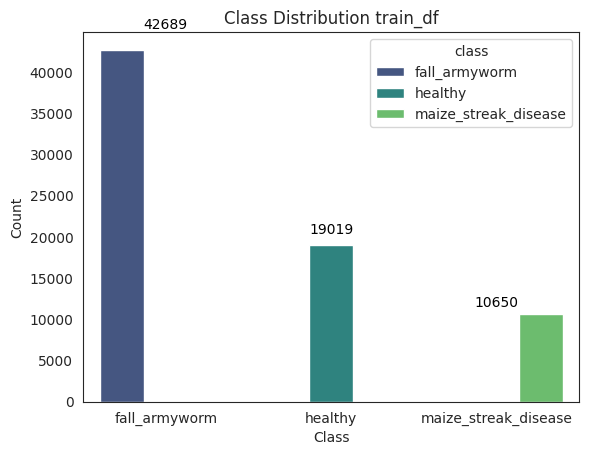

In [79]:

class_counts = train_df['class'].value_counts()

sns.barplot(x=class_counts.index, y=class_counts.values,hue=class_counts.index, palette='viridis')

for i, value in enumerate(class_counts.values):
    plt.text(i, value + 0.05 * value, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Class Distribution train_df')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

In [80]:
print(val_df['class'].value_counts())


class
fall_armyworm           11490
healthy                  4894
maize_streak_disease     2677
Name: count, dtype: int64


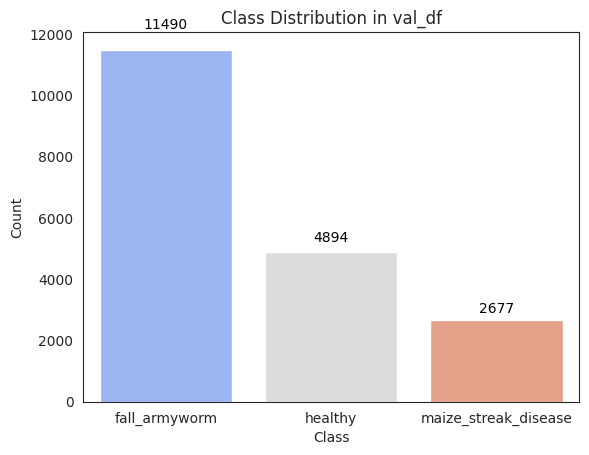

In [81]:

# Compter les classes
class_counts = val_df['class'].value_counts()

# Créer le graphique
sns.barplot(x=class_counts.index, y=class_counts.values, palette='coolwarm')

# Ajouter les valeurs sur les barres
for i, value in enumerate(class_counts.values):
    plt.text(i, value + 0.05 * value, str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Class Distribution in val_df')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [82]:
import yaml

# Distribution des classes dans train_df
class_counts = train_df['class'].value_counts()

# Calcul des pondérations inverses des classes (à titre d'information uniquement)
total_counts = class_counts.sum()
class_weights = {class_name: total_counts / count for class_name, count in class_counts.items()}

# Génération de la liste des noms de classes
class_names = sorted(train_df['class'].unique().tolist())
num_classes = len(class_names)

# Création d'un résumé des classes avec le nom, le nombre d'instances et le poids
class_summary = []
for class_name in class_names:
    class_summary.append({
        'class': class_name,
        'instances': int(class_counts[class_name]),
        'weight': float(class_weights[class_name])
    })

# Création du dictionnaire des données YAML (sans le champ 'weights')
data_yaml = {
    "path": str(DATASETS_DIR.absolute()),
    'train': str(ORIG_TRAIN_IMAGES_DIR.absolute()),
    'val': str(VAL_IMAGES_DIR.absolute()),
    'test': str(TEST_IMAGES_DIR.absolute()),
    'nc': num_classes,
    'names': class_names
}

# Sauvegarde du fichier YAML
yaml_path = 'data.yaml'  # Définir un chemin où l'écriture est autorisée
with open(yaml_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False, sort_keys=False)

# Affichage du fichier YAML généré
print("\n✅ Fichier YAML généré :", yaml_path)

# Affichage du résumé des classes
print("\n📊 Résumé des classes :")
for summary in class_summary:
    print(f"- Class: {summary['class']:25} | Instances: {summary['instances']:4} | Weight: {summary['weight']:.2f}")



✅ Fichier YAML généré : data.yaml

📊 Résumé des classes :
- Class: fall_armyworm             | Instances: 42689 | Weight: 1.70
- Class: healthy                   | Instances: 19019 | Weight: 3.80
- Class: maize_streak_disease      | Instances: 10650 | Weight: 6.79


In [83]:
!pwd

/kaggle/working


In [84]:
len(train_names), len(set(train_names))

(13408, 13408)

In [85]:
len(val_names), len(set(val_names))

(3353, 3353)

In [86]:
val_image_names = [str(Path(name).stem) for name in val_df['Image_ID'].unique()]

In [87]:
len(val_image_names)

3353

In [88]:
# list of images in TRAIN_IMAGES_DIR
images_in_train_dir = os.listdir(ORIG_TRAIN_IMAGES_DIR)
len(images_in_train_dir), len(train_names)

(16761, 13408)

In [89]:
train_image_names = [str(Path(name).stem) for name in train_df['ImagePath'].unique()]

In [90]:
len(train_image_names)

13408

In [91]:
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.1/367.1 kB 10.9 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.23
    Uninstalling albucore-0.0.23:
      Successfully uninstalled albucore-0.0.23
  Attempting uninstall: albumentations
    Found existing installation: albumentations 2.0.4
    Uninstalling albumentations-2.0.4:
      Successfully uninstalled albumentations-2.0.4


In [92]:
##### from ultralytics import YOLO
import time


# Enregistrer l'heure de début
start_time = time.time()


# Charger un modèle YOLOv8 pré-entraîné
model = YOLO("yolo11l'.pt")

# Fine-tuner le modèle sur vos donnée

# Fine-tuner le modèle sur vos données
model.train(
    data=yaml_path,
    epochs=5,                 # Nombre d'époques
    imgsz=1024,                # Taille des images
    batch=8,                  # Taille du lot
    device=0,                # Utiliser le GPU (device=0 pour CUDA)
    patience=0,               # Early stopping après 10 époques sans amélioration
    auto_augment=False,
    amp=True,
    verbose=True,
    save=True,                 # Sauvegarder les poids du modèle
    exist_ok=True,
    cos_lr=True,
    plots=True,             # Reprendre l'entraînement si le dossier existe
    cache='disk'





)


# Enregistrer l'heure de fin
end_time = time.time()

# Calculer le temps total d'entraînement
training_time = end_time - start_time

# Afficher le temps total d'entraînement
print(f"Temps total d'entraînement : {training_time:.2f} secondes")
print(f"Temps total d'entraînement : {training_time / 60:.2f} minutes")


100%|██████████| 49.0M/49.0M [00:00<00:00, 188MB/s]


Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=False, batch=8, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l'.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=0, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=Non

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 74.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 108.1±121.5 MB/s, size: 1178.8 KB)


train: Scanning /kaggle/input/maize-corn-ds/MAIZE/labels/train... 16455 images, 0 backgrounds, 308 corrupt: 100%|██████████| 16761/16761 [01:33<00:00, 178.44it/s]

train: /kaggle/input/maize-corn-ds/MAIZE/images/train/ID_005a4335.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/train/ID_005a4335.jpg'
train: /kaggle/input/maize-corn-ds/MAIZE/images/train/ID_0103fc38.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/train/ID_0103fc38.jpg'
train: /kaggle/input/maize-corn-ds/MAIZE/images/train/ID_013b9cc1.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/train/ID_013b9cc1.jpg'
train: /kaggle/input/maize-corn-ds/MAIZE/images/train/ID_0169210b.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/train/ID_0169210b.jpg'
train: /kaggle/input/maize-corn-ds/MAIZE/images/train/ID_0297c22f.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/train/ID_0297c22f.jpg'


WARNING ⚠️ train: Cache directory /kaggle/input/maize-corn-ds/MAIZE/labels is not writeable, cache not saved.
WARNING ⚠️ train: Skipping caching images to disk, directory not writeable
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 818.4±1358.1 MB/s, size: 2116.7 KB)


val: Scanning /kaggle/working/labels/val... 3353 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3353/3353 [00:11<00:00, 302.75it/s]

val: /kaggle/working/images/val/ID_062c44a6.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/val/ID_0c45571d.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/val/ID_0cdb6f54.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/val/ID_137dbb0d.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/val/ID_15c3f851.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/val/ID_176cca37.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/val/ID_1a7fbf04.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/val/ID_2342e73a.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/val/ID_27f2124b.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/val/ID_2b384ea0.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/val/ID_31b7599f.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/val/ID_3bd4f327.jpg: corrupt JPEG restored and saved
val: /kaggle/working/images/

WARNING ⚠️ val: 89.9GB disk space required, with 50% safety margin but only 12.3/19.5GB free, not caching images to disk
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      12.7G      1.909      2.394      2.178         47       1024: 100%|██████████| 2057/2057 [32:06<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [02:45<00:00,  1.27it/s]


                   all       3353      19061      0.471      0.301      0.311      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5        13G      1.831      2.262      2.114         31       1024: 100%|██████████| 2057/2057 [31:29<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [02:36<00:00,  1.34it/s]


                   all       3353      19061      0.527      0.395      0.407        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      12.9G      1.746      2.098      2.033         48       1024: 100%|██████████| 2057/2057 [31:15<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [02:31<00:00,  1.38it/s]


                   all       3353      19061      0.523      0.433      0.448      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      12.9G      1.673      1.943      1.971         60       1024: 100%|██████████| 2057/2057 [31:15<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [02:32<00:00,  1.38it/s]


                   all       3353      19061       0.56      0.493      0.503       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5        13G      1.604      1.797      1.908         26       1024: 100%|██████████| 2057/2057 [31:14<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [02:32<00:00,  1.38it/s]


                   all       3353      19061      0.587      0.522      0.543      0.315

5 epochs completed in 2.846 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,281,625 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 210/210 [02:21<00:00,  1.49it/s]


                   all       3353      19061      0.587      0.522      0.543      0.314
         fall_armyworm       1042       4894      0.583       0.74      0.705      0.403
               healthy       1116      11490      0.489      0.166      0.232     0.0832
  maize_streak_disease       1225       2677       0.69       0.66      0.693      0.457


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.4ms preprocess, 27.3ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train
Temps total d'entraînement : 10553.81 secondes
Temps total d'entraînement : 175.90 minutes


In [93]:

# Charger le modèle YOLO entraîné
model_path = 'runs/detect/train/weights/best.pt'

model = YOLO(model_path)


In [94]:
metrics = model.val(
    data=yaml_path,
    split="test",
    imgsz=1024,
    save=True,
    save_txt=True,
    save_conf=True,
    save_hybrid=True,
    plots=True
)

print("\n📊 Évaluation terminée avec les paramètres par défaut :")
for k, v in metrics.results_dict.items():
    print(f"{k}: {v:.4f}")

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in in the future.
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,281,625 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 82.9±51.6 MB/s, size: 2423.5 KB)


val: Scanning /kaggle/input/maize-corn-ds/MAIZE/labels/test... 1825 images, 0 backgrounds, 38 corrupt: 100%|██████████| 1863/1863 [00:14<00:00, 127.34it/s]

val: /kaggle/input/maize-corn-ds/MAIZE/images/test/ID_083446dc.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/test/ID_083446dc.jpg'
val: /kaggle/input/maize-corn-ds/MAIZE/images/test/ID_094bf9dc.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/test/ID_094bf9dc.jpg'
val: /kaggle/input/maize-corn-ds/MAIZE/images/test/ID_30f58d0e.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/test/ID_30f58d0e.jpg'
val: /kaggle/input/maize-corn-ds/MAIZE/images/test/ID_31fc5b54.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/test/ID_31fc5b54.jpg'
val: /kaggle/input/maize-corn-ds/MAIZE/images/test/ID_3c03453d.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/test/ID_3c03453d.jpg'
val: /kaggle/input/m

WARNING ⚠️ val: Cache directory /kaggle/input/maize-corn-ds/MAIZE/labels is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 115/115 [05:32<00:00,  2.89s/it]


                   all       1825       9884      0.579      0.546      0.555      0.318
         fall_armyworm        585       2673      0.564       0.75        0.7      0.399
               healthy        598       5791      0.493      0.195      0.245     0.0847
  maize_streak_disease        662       1420      0.679      0.693      0.721       0.47


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.6ms preprocess, 63.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val

📊 Évaluation terminée avec les paramètres par défaut :
metrics/precision(B): 0.5789
metrics/recall(B): 0.5460
metrics/mAP50(B): 0.5553
metrics/mAP50-95(B): 0.3179
fitness: 0.3416


In [95]:
# Évaluation du modèle sur le jeu de test avec les paramètres par défaut
metrics = model.val(
    data=yaml_path,
    split="test",       # Important pour utiliser le dossier test dans ton YAML
    imgsz=1024,
    save=True,
    save_txt=True,
    save_conf=True,
    save_hybrid=True,
    plots=True
)

# Affichage des métriques
print("\n📊 Évaluation terminée avec les paramètres par défaut :")
for k, v in metrics.items():
    print(f"{k}: {v:.4f}")


WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in in the future.
Ultralytics 8.3.144 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 577.4±892.4 MB/s, size: 1530.1 KB)


val: Scanning /kaggle/input/maize-corn-ds/MAIZE/labels/test... 1825 images, 0 backgrounds, 38 corrupt: 100%|██████████| 1863/1863 [00:04<00:00, 375.46it/s]


val: /kaggle/input/maize-corn-ds/MAIZE/images/test/ID_083446dc.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/test/ID_083446dc.jpg'
val: /kaggle/input/maize-corn-ds/MAIZE/images/test/ID_094bf9dc.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/test/ID_094bf9dc.jpg'
val: /kaggle/input/maize-corn-ds/MAIZE/images/test/ID_30f58d0e.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/test/ID_30f58d0e.jpg'
val: /kaggle/input/maize-corn-ds/MAIZE/images/test/ID_31fc5b54.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/test/ID_31fc5b54.jpg'
val: /kaggle/input/maize-corn-ds/MAIZE/images/test/ID_3c03453d.jpg: ignoring corrupt image/label: [Errno 30] Read-only file system: '/kaggle/input/maize-corn-ds/MAIZE/images/test/ID_3c03453d.jpg'
val: /kaggle/input/m

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 115/115 [05:31<00:00,  2.88s/it]


                   all       1825       9884      0.579      0.546      0.555      0.318
         fall_armyworm        585       2673      0.564       0.75        0.7      0.399
               healthy        598       5791      0.493      0.195      0.245     0.0847
  maize_streak_disease        662       1420      0.679      0.693      0.721       0.47


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.7ms preprocess, 63.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val2

📊 Évaluation terminée avec les paramètres par défaut :


AttributeError: 'DetMetrics' object has no attribute 'items'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class.
        names (dict): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (dict): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
    

In [ ]:
import os
import torch
from ultralytics import YOLO
from tqdm import tqdm

# Définir le seuil de confiance à 0
CONFIDENCE_THRESHOLD = 0.25  

# Charger le modèle YOLO entraîné
model_path = 'runs/detect/train/weights/best.pt'

model = YOLO(model_path)

# Chemin vers le dossier contenant les images de test
test_dir_path = TEST_IMAGES_DIR  # Assurez-vous que cette variable est bien définie

# Récupérer la liste des fichiers d'image dans le répertoire de test
image_files = os.listdir(test_dir_path)

# Liste pour stocker les résultats
all_data = []

# Boucle sur chaque image du répertoire
for image_file in tqdm(image_files):
    img_path = os.path.join(test_dir_path, image_file)

    # Effectuer l'inférence avec conf=0.0
    results = model(img_path, conf=0.25, iou=0.7, augment=True, imgsz=1024)

    # Extraire les résultats
    boxes = results[0].boxes.xyxy.tolist() if results[0].boxes else []
    classes = results[0].boxes.cls.tolist() if results[0].boxes else []
    confidences = results[0].boxes.conf.tolist() if results[0].boxes else []
    names = results[0].names

    if boxes:  
        for box, cls, conf in zip(boxes, classes, confidences):
            if conf >= CONFIDENCE_THRESHOLD:  # Appliquer le seuil de confiance
                x1, y1, x2, y2 = box
                detected_class = names[int(cls)]  

                all_data.append({
                    'Image_ID': str(image_file),
                    'class': detected_class,
                    'confidence': conf,
                    'ymin': y1,
                    'xmin': x1,
                    'ymax': y2,
                    'xmax': x2
                })
    else:  
        all_data.append({
            'Image_ID': str(image_file),
            'class': "None",
            'confidence': None,
            'ymin': None,
            'xmin': None,
            'ymax': None,
            'xmax': None
        })

# Afficher un aperçu des résultats
print(all_data[:5])  # Affiche les 5 premières prédictions pour vérifier


In [ ]:
# Convert the list to a DataFrame for all images
sub = pd.DataFrame(all_data)

In [ ]:
sub.head()

In [ ]:
sub['class'].value_counts()

In [ ]:
# Create submission file to be uploaded to Zindi for scoring
sub.to_csv("/kaggle/working/Subtest.csv", index=False)


In [ ]:
train['Image_ID'].nunique(), test['Image_ID'].nunique()

In [ ]:
#train_df['Image_ID'].nunique() + val_df['Image_ID'].nunique() + test['Image_ID'].nunique()

In [ ]:
sub = pd.read_csv("/kaggle/working/Subtest.csv")
sub.head()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Vérifier si sub existe et contient des données
if 'sub' in locals() and not sub.empty:
    # Créer un dataframe des images sans détection
    no_detection = sub[~sub['class'].isin(train_df['class'].unique())]

    if not no_detection.empty:
        print(f"Nombre d'images uniques sans détection : {no_detection['Image_ID'].nunique()}")

        # Sélectionner une image aléatoire si disponible
        if not no_detection.empty:
            rnd_no_detect_image = no_detection.sample(1)['Image_ID'].values[0]
            print(f"Image sélectionnée aléatoirement sans détection : {rnd_no_detect_image}")

            # Afficher cette image
            image_path = os.path.join(TEST_IMAGES_DIR, rnd_no_detect_image)
            image = np.array(Image.open(image_path))
            plt.figure(figsize=(6, 6))
            plt.imshow(image)
            plt.axis("off")
            plt.show()
        


In [ ]:
# Afficher toutes les images sans détection
for image_name in no_detection['Image_ID'].unique():
    image_path = os.path.join(TEST_IMAGES_DIR, image_name)
    plt.figure(figsize=(6, 6))
    plt.title(image_name)
    image = np.array(Image.open(image_path))
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    print('--------------------------------------\n')
else:
    print("Aucune image sans détection.")


In [ ]:
!pip install torchmetrics opencv-python
    

In [ ]:
import os
import cv2
import pandas as pd
import torch
from torchmetrics.detection.mean_ap import MeanAveragePrecision

# === CONFIGURATION ===
submission_file = sub
labels_folder = "labels"
images_folder = "images"  # Utilisé pour lire la taille des images

# === UTILITAIRES ===
def yolo_to_xyxy(cls, x, y, w, h, W, H):
    cx = x * W
    cy = y * H
    bw = w * W
    bh = h * H
    xmin = cx - bw / 2
    ymin = cy - bh / 2
    xmax = cx + bw / 2
    ymax = cy + bh / 2
    return [xmin, ymin, xmax, ymax, cls]

def get_image_shape(image_path):
    img = cv2.imread(image_path)
    return img.shape[1], img.shape[0]  # width, height

# === CHARGER SUBMISSION ===
df = pd.read_csv(submission_file)

# Regrouper les prédictions par image
grouped_preds = df.groupby("Image_ID")

# === PRÉPARER LES PREDICTIONS ET GT POUR TORCHMETRICS ===
predictions = []
ground_truths = []

for image_id, group in grouped_preds:
    image_path = os.path.join(images_folder, image_id)
    label_path = os.path.join(labels_folder, image_id.replace(".jpg", ".txt"))

    # Lire résolution image
    if not os.path.exists(image_path):
        continue
    W, H = get_image_shape(image_path)

    # === GT ===
    gt_boxes = []
    gt_labels = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                parts = list(map(float, line.strip().split()))
                cls = int(parts[0])
                bbox = yolo_to_xyxy(cls, *parts[1:], W, H)
                gt_boxes.append(bbox[:4])
                gt_labels.append(cls)

    ground_truths.append({
        "boxes": torch.tensor(gt_boxes),
        "labels": torch.tensor(gt_labels)
    })

    # === PREDICTIONS ===
    pred_boxes = []
    pred_scores = []
    pred_labels = []

    for _, row in group.iterrows():
        if pd.isna(row['confidence']):
            continue
        try:
            cls_id = int(row['class'])  # Utilisation directe
        except:
            continue  # Skip si 'class' est invalide

        box = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
        pred_boxes.append(box)
        pred_scores.append(row['confidence'])
        pred_labels.append(cls_id)

    predictions.append({
        "boxes": torch.tensor(pred_boxes),
        "scores": torch.tensor(pred_scores),
        "labels": torch.tensor(pred_labels)
    })

# === ÉVALUATION ===
metric = MeanAveragePrecision(iou_type="bbox", iou_thresholds=None)
metric.update(predictions, ground_truths)
results = metric.compute()

# === AFFICHAGE ===
print("\n📊 Évaluation des métriques :")
print(f"mAP@0.50       : {results['map_50']:.4f}")
print(f"mAP@0.50:0.95  : {results['map']:.4f}")
print(f"Recall         : {results['recall']:.4f}")
print(f"Precision      : {results['precision']:.4f}")


In [ ]:
print("end")


In [ ]:
import torch
print(torch.cuda.device_count())  # Si ça affiche "1", alors Kaggle ne permet pas d'utiliser les 2 GPU.
